In [1]:
#!git clone https://github.com/meituan/YOLOv6

In [2]:
cd YOLOv6

D:\yolov6_env\yolov6_custom_dataset\YOLOv6


In [3]:
#!pip install -r requirements.txt
# AssertionError: Torch not compiled with CUDA enabled

# This requirement file is not installing torch with cuda. So if you want to train your model using gpu then install torch with cuda

# Below torch version works with rtx 3090 (cuda 11.1)
#!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio==0.8.1 -f https://download.pytorch.org/whl/torch_stable.html


In [4]:
import torch
torch.cuda.is_available() 
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 3090'

In [5]:
# Put your dataset folder in yolov6 folder
# create dataset.yaml

# Train

In [7]:
#!python tools/train.py --batch 16 --conf configs/yolov6s_finetune.py --data dataset.yaml --device 0 --epochs 50 --eval-interval 2

!python tools/train.py --batch 16 --conf configs/yolov6s_finetune.py --data-path dataset.yaml --device 0 --epochs 10 --eval-interval 2

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.24s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.97s).
Accumulating evaluation results...
DONE (t=0.53s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.034
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.052
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.040
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.006
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.040
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.287
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.572
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDet

training args are: Namespace(batch_size=16, check_images=False, check_labels=False, conf_file='configs/yolov6s_finetune.py', data_path='dataset.yaml', device='0', dist_url='default url: tcp://127.0.0.1:8888', epochs=10, eval_final_only=False, eval_interval=2, gpu_count=0, heavy_eval_range=50, img_size=640, local_rank=-1, name='exp', output_dir='./runs/train', rank=-1, resume=None, workers=8, world_size=1)

Using 1 GPU for training... 
Train: Final numbers of valid images: 1529/ labels: 1529. 
0.0s for dataset initialization.
Convert to COCO format

100%|##########| 239/239 [00:00<00:00, 47798.91it/s]
Convert to COCO format finished. Resutls saved in ../data\annotations\instances_val.json
Val: Final numbers of valid images: 239/ labels: 239. 
0.0s for dataset initialization.
Loading state_dict from ./weights/yolov6s.pt for fine-tuning...
Model: Model(
  (backbone): EfficientRep(
    (stem): RepVGGBlock(
      (nonlinearity): ReLU(inplace=True)
      (se): Identity()
      (rbr_dense): S

# Evaluation

In [8]:
#!python tools/eval.py --data dataset.yaml  --weights run/train/exp7/weights/best_ckpt.pt --device 0

# Inference

In [21]:
#cd YOLOv6
!python tools/infer.py --weights runs/train/exp7/weights/best_ckpt.pt --source test_images/1.jpg --yaml dataset.yaml --device 0 

Namespace(agnostic_nms=False, classes=None, conf_thres=0.25, device='0', half=False, hide_conf=False, hide_labels=False, img_size=640, iou_thres=0.45, max_det=1000, name='exp', project='runs/inference', save_img=True, save_txt=False, source='test_images/1.jpg', weights='runs/train/exp7/weights/best_ckpt.pt', yaml='dataset.yaml')
Save directory already existed
Loading checkpoint from runs/train/exp7/weights/best_ckpt.pt

Fusing model...

100%|##########| 1/1 [00:00<00:00, 32.26it/s]
Results saved to runs/inference\exp


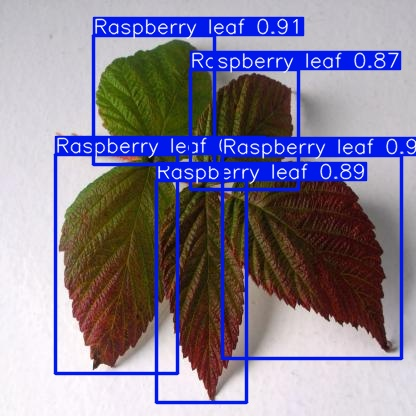

In [22]:
from IPython.display import Image #this is to render predictions
Image(filename='runs/inference/exp/1.jpg', width=1000)